# Data exploration

## Imports

In [1]:
# Here are all of our imports used for data cleaning and manipulation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## General exploration and some cleaning

In [2]:
# Reading in the data, with fixed lesion_id's
rel_path = "../data/metadata/fixed_metadata.csv"

df_pad_ufes = pd.read_csv(rel_path, index_col=0)

In [3]:
# Sorting the data by lesion_id to check for the new names we changed
df_pad_ufes = df_pad_ufes.sort_values(["lesion_id"]) 

cancer_conditions = ["BCC", "MEL", "SCC"]
no_cancer_conditions = ["ACK", "NEV", "SEK"]

def label_diagnostic(diagnostic):
    if diagnostic in cancer_conditions:
        return 'Skin cancer'
    elif diagnostic in no_cancer_conditions:
        return 'Skin disease'

# Applying the function to the "diagnostic" column to create a new "cancer_label" column
df_pad_ufes['cancer_label'] = df_pad_ufes['diagnostic'].apply(label_diagnostic)
df_pad_ufes

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,cancer_label
1244,PAT_88,1,False,True,GERMANY,POMERANIA,65,True,MALE,True,...,BCC,False,True,False,False,False,True,PAT_88_1_64.png,True,Skin cancer
7,PAT_117,2,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,...,BCC,True,True,True,False,True,True,PAT_117_2_983.png,True,Skin cancer
497,PAT_90,3,False,False,POMERANIA,POMERANIA,74,False,FEMALE,False,...,SEK,False,False,False,False,False,True,PAT_90_3_648.png,False,Skin disease
214,PAT_256,4,False,False,POMERANIA,POMERANIA,90,False,FEMALE,True,...,SEK,False,True,False,False,False,True,PAT_256_4_583.png,False,Skin disease
1751,PAT_91,5,False,False,ITALY,PORTUGAL,65,True,MALE,False,...,ACK,True,False,False,False,False,False,PAT_91_5_332.png,False,Skin disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,PAT_2159,4792,NaN,NaN,NaN,NaN,35,NaN,NaN,NaN,...,NEV,False,True,False,False,False,False,PAT_2159_4792_718.png,False,Skin disease
1602,PAT_2160,4814,NaN,NaN,NaN,NaN,76,NaN,NaN,NaN,...,ACK,False,False,False,False,False,False,PAT_2160_4814_243.png,False,Skin disease
1322,PAT_2161,4818,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,...,NEV,False,True,False,False,False,True,PAT_2161_4818_501.png,False,Skin disease
2122,PAT_2161,4819,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,...,NEV,False,False,False,False,False,False,PAT_2161_4819_719.png,False,Skin disease


In [5]:
# i want to find all the unique skin lesions in the dataset
print(f"all unique skin lesions: {len(df_pad_ufes.lesion_id.unique())}")

all unique skin lesions: 1686


In [6]:
# Removing all the rows that doesn't have an entry in the "gender" column, as that"s what we're focusing on
df_pad_ufes = df_pad_ufes[~df_pad_ufes["gender"].isna()]

# Here we're dropping the duplicates, but keeping the first occurence of the lesion_id
df_pad_ufes = df_pad_ufes.drop_duplicates("lesion_id", keep = "first")

# Grouping the counts of the diagones and genders, then we're making a pivot table to make it easier to read
gender_diagnostic_counts = df_pad_ufes.groupby(["gender", "diagnostic"]).size().reset_index(name="count")
gender_diagnostic_pivot = gender_diagnostic_counts.pivot(index="diagnostic", columns="gender", values="count")

print(gender_diagnostic_pivot)
print(df_pad_ufes.shape)

gender      FEMALE  MALE
diagnostic              
ACK            135   113
BCC            311   341
MEL             19    17
NEV             41    22
SCC             71    74
SEK             22    13
(1179, 27)


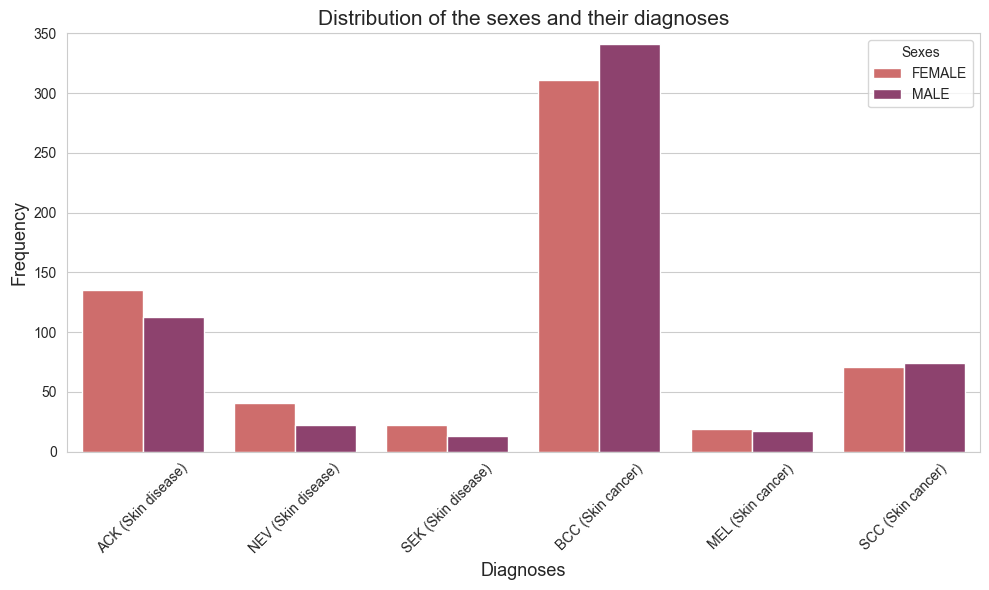

In [106]:
# We define a custom order for the x-axis
custom_order = [
    "ACK (Skin disease)", "NEV (Skin disease)", "SEK (Skin disease)", 
    "BCC (Skin cancer)", "MEL (Skin cancer)", "SCC (Skin cancer)"
]

# We remake the pivot table from before to include the cancer_label in the x-axis, with their diagnostic
df_pad_ufes["diagnostic_info"] = df_pad_ufes["diagnostic"] + " (" + df_pad_ufes["cancer_label"] + ")"
gender_diagnostic_counts = df_pad_ufes.groupby(["gender", "diagnostic_info"]).size().reset_index(name="count")


# Here we plot
plt.figure(figsize=(10, 6))
plots = sns.barplot(data=gender_diagnostic_counts, x="diagnostic_info", y="count", hue="gender", palette="flare", order=custom_order)
plt.title("Distribution of the sexes and their diagnoses", fontsize=15)
plt.xlabel("Diagnoses", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation=45)
plt.ylim(0, 350)
legend = plt.legend(title="Sexes")
sns.set_style("whitegrid")
plt.tight_layout() 
plt.savefig("../analysis/plots/diagnoses_distribution.png", dpi=300, format="png", bbox_inches="tight")
plt.show()

### Checking for the instances where the lesion_id is shared between multiple patients
\
This should now be at 0, as we have fixed it, by replacing the wrong values in the `df_pad_ufes.csv`, so we're just skipping it.

In [107]:
duplicate_counts = df_pad_ufes.groupby("lesion_id")["patient_id"].agg({"count", "unique"})
duplicates_with_different_patient_id = duplicate_counts[(duplicate_counts["count"] > 1) & (duplicate_counts["unique"].apply(len) > 1)]

total_instances = duplicates_with_different_patient_id.shape[0]

print("total instances of duplicates with different patient_id's:", total_instances)
for lesion_id, data in duplicates_with_different_patient_id.iterrows():
    # prints if there are duplicates with different patient_id
    print("lesion_id:", lesion_id)
    print("different patient_id's", data["unique"])
    instances = df_pad_ufes[df_pad_ufes["lesion_id"] == lesion_id]

total instances of duplicates with different patient_id's: 0


In [120]:
cancer_conditions = ["BCC", "MEL", "SCC"]
no_cancer_conditions = ["ACK", "NEV", "SEK"]
genders = ["FEMALE", "MALE"]

# Creating the categories that correspond to the Eike Petersen paper.
female_cancer = df_pad_ufes[(df_pad_ufes["diagnostic"].isin(cancer_conditions)) & (df_pad_ufes["gender"] == genders[0])].copy()
male_cancer = df_pad_ufes[(df_pad_ufes["diagnostic"].isin(cancer_conditions)) & (df_pad_ufes["gender"] == genders[1])].copy()

female_no_cancer = df_pad_ufes[(df_pad_ufes["diagnostic"].isin(no_cancer_conditions)) & (df_pad_ufes["gender"] == genders[0])].copy()
male_no_cancer = df_pad_ufes[(df_pad_ufes["diagnostic"].isin(no_cancer_conditions)) & (df_pad_ufes["gender"] == genders[1])].copy()

# Creating variables that contain the ids of the patients that have cancer and don"t have cancer
female_cancer_id = female_cancer["patient_id"]
male_cancer_id = male_cancer["patient_id"]
female_no_cancer_id = female_no_cancer["patient_id"]
male_no_cancer_id = male_no_cancer["patient_id"]

print("males with skin cancer", len(male_cancer["cancer_label"]))
print("males with skin disease", len(male_no_cancer["cancer_label"]))
print("female with skin cancer", len(female_cancer["cancer_label"]))
print("females with skin disese", len(female_no_cancer["cancer_label"]))

print("Total of women in the dataset (after cleaning the data:", len(female_cancer + female_no_cancer))
print("Total of men in the dataset (after cleaning the data):", len(male_cancer + male_no_cancer))
print("Total:", len(female_cancer + female_no_cancer + male_no_cancer + male_cancer))

males with skin cancer 432
males with skin disease 148
female with skin cancer 401
females with skin disese 198
Total of women in the dataset (after cleaning the data: 599
Total of men in the dataset (after cleaning the data): 580
Total: 1179


In [109]:
# Checking how many patients have been biopsed
print(len(df_pad_ufes[df_pad_ufes["biopsed"] == True]))
print(len(df_pad_ufes[df_pad_ufes["biopsed"] == False]))
df_pad_ufes[df_pad_ufes["biopsed"] == False].head()

1047
132


,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,cancer_label,diagnostic_info
497,PAT_90,3,False,False,POMERANIA,POMERANIA,74,False,FEMALE,False,...,False,False,False,False,False,True,PAT_90_3_648.png,False,Skin disease,SEK (Skin disease)
214,PAT_256,4,False,False,POMERANIA,POMERANIA,90,False,FEMALE,True,...,False,True,False,False,False,True,PAT_256_4_583.png,False,Skin disease,SEK (Skin disease)
1751,PAT_91,5,False,False,ITALY,PORTUGAL,65,True,MALE,False,...,True,False,False,False,False,False,PAT_91_5_332.png,False,Skin disease,ACK (Skin disease)
1735,PAT_180,10,False,True,GERMANY,GERMANY,54,False,FEMALE,False,...,True,True,False,False,True,False,PAT_180_10_831.png,False,Skin disease,ACK (Skin disease)
1018,PAT_177,11,False,False,GERMANY,GERMANY,52,False,FEMALE,False,...,True,False,False,False,False,False,PAT_177_11_786.png,False,Skin disease,ACK (Skin disease)


In [110]:
# Checking how many patients of each fitspatrick scale there are
print(len(df_pad_ufes[df_pad_ufes["fitspatrick"] == 1.0]))
print(len(df_pad_ufes[df_pad_ufes["fitspatrick"] == 2.0]))
print(len(df_pad_ufes[df_pad_ufes["fitspatrick"] == 3.0]))
print(len(df_pad_ufes[df_pad_ufes["fitspatrick"] == 4.0]))
print(len(df_pad_ufes[df_pad_ufes["fitspatrick"] == 5.0]))
print(len(df_pad_ufes[df_pad_ufes["fitspatrick"] == 6.0]))

127
694
306
42
9
1


In [111]:
pad1_and_2 = df_pad_ufes[(df_pad_ufes["fitspatrick"] == 1.0) | (df_pad_ufes["fitspatrick"] == 2.0)]
pad1_and_2.shape

(821, 28)

In [112]:
pad_rest = df_pad_ufes[(df_pad_ufes["fitspatrick"] == 3.0) | (df_pad_ufes["fitspatrick"] == 4.0)| (df_pad_ufes["fitspatrick"] == 5.0)| (df_pad_ufes["fitspatrick"] == 6.0)]
pad_rest.shape

(358, 28)

In [113]:
# Checking how many of each type of cancer there are based on their skin type (1 and 2)
print("Fitzpatrick 1 and 2 with cancer", len(pad1_and_2[pad1_and_2 ["cancer_label"] == "Skin cancer"]))
print("Fitzpatrick 1 and 2 without cancer", len(pad1_and_2[pad1_and_2 ["cancer_label"] == "Skin disease"]))

# Checking how many of each type of cancer there are based on their skin type (3, 4, 5, 6)
print("Fitzpatrick 3, 4, 5, 6 with cancer", len(pad_rest[pad_rest ["cancer_label"] == "Skin cancer"]))
print("Fitzpatrick 3, 4, 5, 6 without cancer", len(pad_rest[pad_rest ["cancer_label"] == "Skin disease"]))

Fitzpatrick 1 and 2 with cancer 604
Fitzpatrick 1 and 2 without cancer 217
Fitzpatrick 3, 4, 5, 6 with cancer 229
Fitzpatrick 3, 4, 5, 6 without cancer 129


C:\Users\andre\AppData\Local\Temp\ipykernel_22368\2592434558.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=fitzpatrick_counts, x="fitspatrick", y="count", palette="flare")


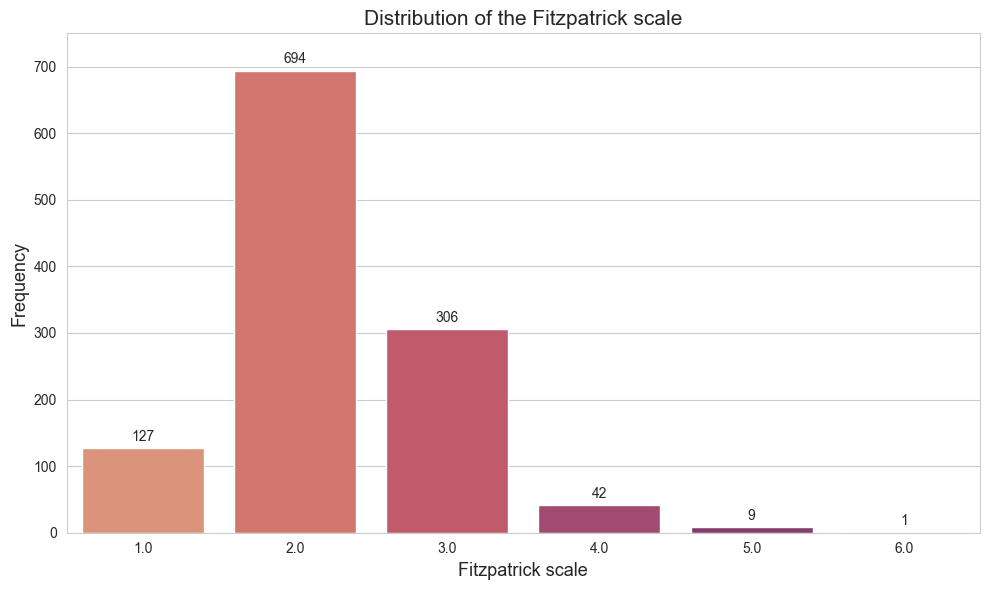

In [7]:
fitzpatrick_counts = df_pad_ufes.groupby("fitspatrick").size().reset_index(name="count")
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plot = sns.barplot(data=fitzpatrick_counts, x="fitspatrick", y="count", palette="flare")
plt.title("Distribution of the Fitzpatrick scale", fontsize=15)
plt.xlabel("Fitzpatrick scale", fontsize=13)
plt.ylabel("Frequency", fontsize=13)

for p in plot.patches:
    height = p.get_height()
    plt.annotate(f'{height:.0f}',
                 xy=(p.get_x() + p.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.ylim(0, 750)
plt.tight_layout() 
plt.savefig("../analysis/plots/fitzpatrick_distribution.png", dpi=300, format="png", bbox_inches="tight")
plt.show()